# HELP performance in E vs NE problem

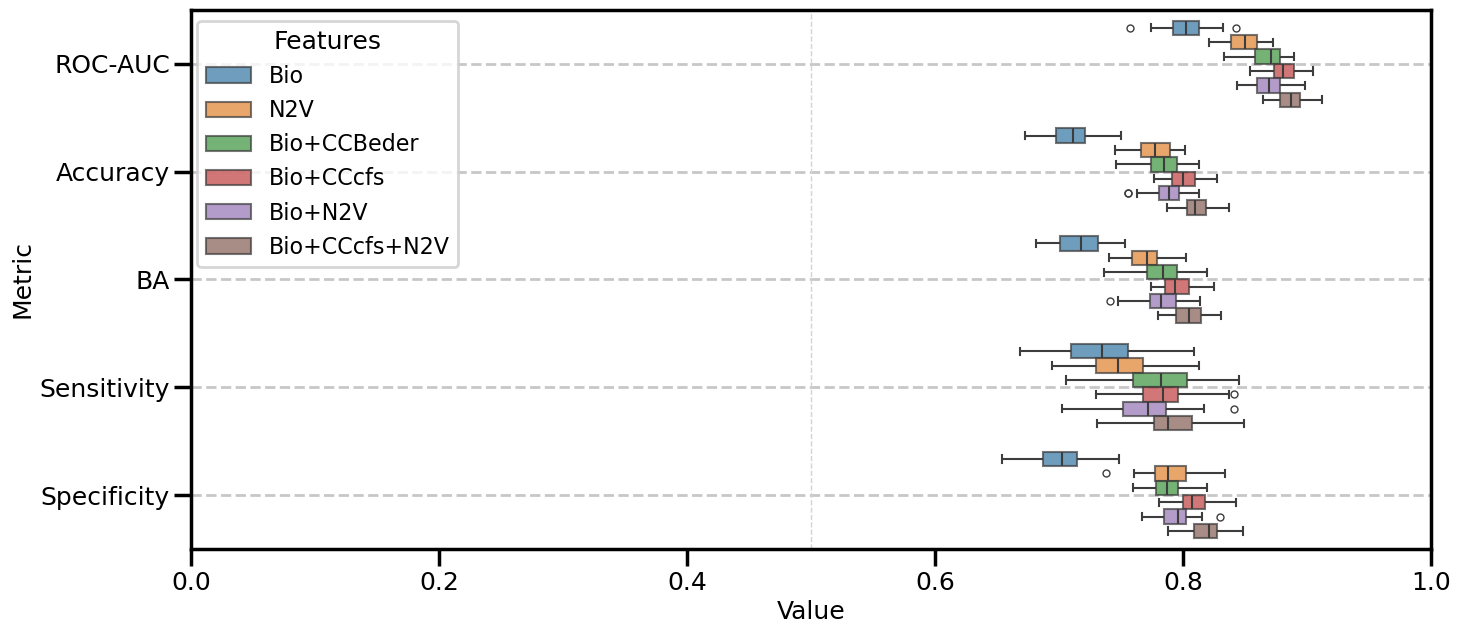

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

tissue = 'Lung'
problem = 'EvsAE'

scorepath = '../../scores'
features = ["Bio", "N2V", "Bio+CCBeder", "Bio+CCcfs", "Bio+N2V", "Bio+CCcfs+N2V"]
suffixes = ['bio','n2v', 'bioccbeder', 'biocc', 'bion2v', 'bioccn2v']

# Upload input datasets
dfs = []
for feature,suffix in zip(features,suffixes):
    df_tmp = pd.read_csv(os.path.join(scorepath, f"score_HELP_{tissue}_{problem}_{suffix}.csv")).drop(columns=["MCC", "CM"])
    #df_tmp = pd.read_csv(os.path.join(scorepath, f"score_HELP_{tissue}_{problem}_{suffix}.csv")).drop(columns=["ROC-AUC", "Accuracy", "CM"])
    df_tmp['Feature'] = feature
    dfs += [df_tmp]

# Merge datasets and modify the dataframe for boxplot generation
Scores = pd.concat(dfs)
Scores = pd.melt(Scores, id_vars=["Feature"], var_name="Metric", value_name="Value")

# Set seaborn style
sns.set_context("poster")
#sns.set(style="whitegrid", palette="pastel")

# Generate boxplots
plt.figure(figsize=(16, 7))
sns.boxplot(x="Value", y="Metric", hue="Feature", data=Scores, dodge=True,
            linewidth=1.5, fliersize=5, saturation=0.75, notch=False, boxprops=dict(alpha=0.7))

plt.xlim(0.0, 1)
#plt.title("Boxplots of Classification Metrics", fontsize=18)
plt.xlabel("Value", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Metric", fontsize=18)
plt.legend(title="Features", fontsize="16", title_fontsize="18", loc="upper center", bbox_to_anchor=(0.11, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add vertical lines between groups of metric values
unique_metrics = Scores["Metric"].unique()
for i in range(1, len(unique_metrics)):
    plt.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=1)
plt.show()


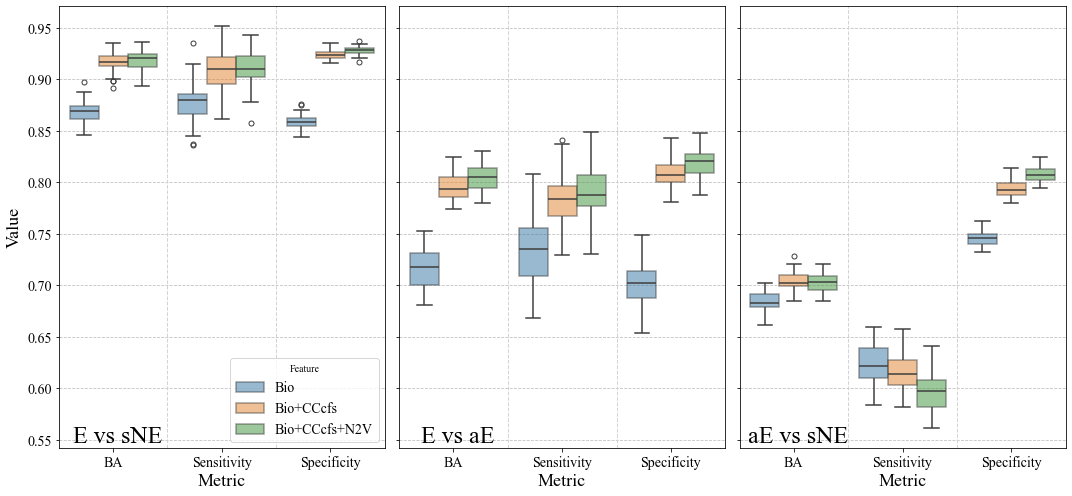

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

tissue = 'Lung'
scorepath = '../../scores'
features = ["Bio", "Bio+CCcfs", "Bio+CCcfs+N2V"]
suffixes = ['bio', 'biocc', 'bioccn2v']
problems = ['EvsSNE', 'EvsaE', 'aEvsSNE']
labels = ['E vs sNE', 'E vs aE', 'aE vs sNE']
fsize = 14
plt.rcParams["font.family"] = "Times New Roman"

def generate_subplot(Scores, ax, fsize=10):
    sns.boxplot(x='Metric', y='Value', hue='Feature', data=Scores, dodge=True, linewidth=1.5, fliersize=5,
                saturation=0.75, notch=False, boxprops=dict(alpha=0.5), ax=ax)
    ax.set_xlabel("Metric", fontsize=int(fsize)+4)
    ax.set_ylabel('Value', fontsize=int(fsize)+4)
    ax.tick_params(axis='both', which='major', labelsize=fsize)
    ax.grid(axis="y", linestyle="--", alpha=0.8)
    unique_metrics = Scores["Metric"].unique()
    for i in range(1, len(unique_metrics)):
        ax.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=1)
    ax.get_legend().remove()

# Creazione di una figura con tre subplot su stessa riga
fig, axs = plt.subplots(1, len(problems), figsize=(15, 7), sharey=True)

# Iterazione sui subplot e applicazione della funzione generate_subplot
for i, problem in enumerate(problems):
    dfs = []
    for feature, suffix in zip(features, suffixes):
        df_tmp = pd.read_csv(os.path.join(scorepath, f"score_HELP_{tissue}_{problem}_{suffix}.csv")).drop(columns=["ROC-AUC", "Accuracy", "MCC", "CM"])
        df_tmp['Feature'] = feature
        dfs.append(df_tmp)

    # Merge datasets and modify the dataframe for boxplot generation
    Scores = pd.concat(dfs)
    Scores = pd.melt(Scores, id_vars=["Feature"], var_name="Metric", value_name="Value")
    generate_subplot(Scores, axs[i], fsize=fsize)
    axs[i].set_title(f"{labels[i]}", x=0.18, y=-0.0, fontsize=24)

# Posizionamento della legenda unica
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.21, 0.10), fontsize=fsize, title='Feature', title_fontsize='10')

# Visualizzazione della figura
plt.tight_layout()
plt.show()

In [57]:
os.listdir(scorepath)

['score_HELP_Brain_EvsNE_n2v.csv',
 'score_HELP_Brain_EvsNE_bio.csv',
 'score_HELP_Brain_EvsNE_bioccn2v.csv',
 'score_HELP_Brain_EvsNE_cc.csv',
 'score_HELP_Lung_EvsNE_bion2v.csv',
 'score_HELP_Brain_EvsNE_bion2v.csv',
 'score_HELP_Lung_EvsNE_bio.csv',
 'score_HELP_Lung_EvsNE_n2v.csv',
 'score_HELP_Kidney_EvsNE_cc.csv',
 'score_HELP_Lung_EvsNE_cc.csv',
 'score_HELP_Kidney_EvsNE_bion2v.csv',
 'score_HELP_Lung_EvsNE_bioccn2v.csv',
 'score_HELP_Lung_EvsNE_biocc.csv',
 'score_HELP_Kidney_EvsNE_bio.csv',
 'score_HELP_Kidney_EvsNE_bioccn2v.csv',
 'score_HELP_Kidney_EvsNE_n2v.csv',
 'score_HELP_Kidney_EvsNE_biocc.csv',
 'score_HELP_Brain_EvsNE_biocc.csv']

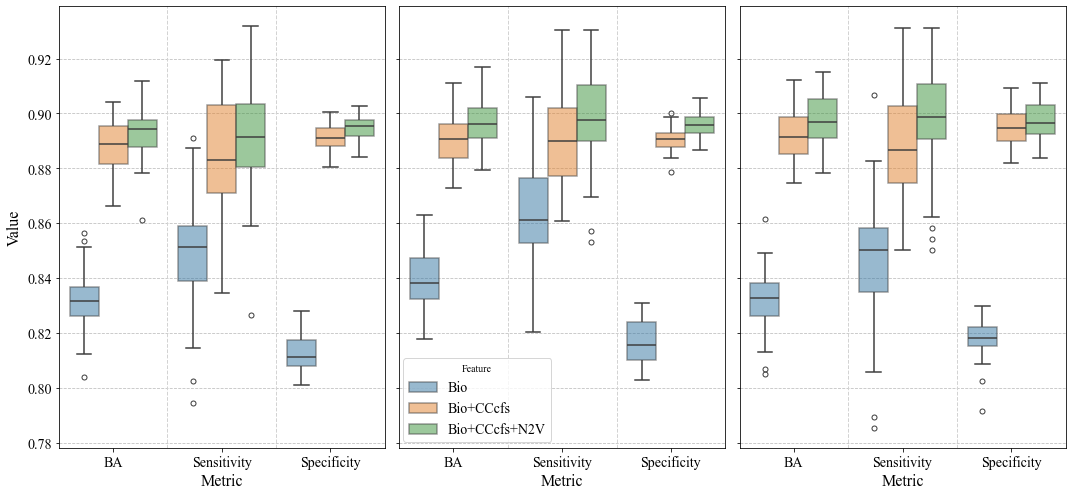

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

tissues = ['Kidney', 'Lung', 'Brain']
scorepath = '../../data4rev/scores'
features = ["Bio", "Bio+CCcfs", "Bio+CCcfs+N2V"]
suffixes = ['bio', 'biocc', 'bioccn2v']
problem = 'EvsNE'
labels = ['(A) Kidney', '(B) Lung', '(C) Brain']
fsize = 14
plt.rcParams["font.family"] = "Times New Roman"

def generate_subplot(Scores, ax, fsize=10):
    sns.boxplot(x='Metric', y='Value', hue='Feature', data=Scores, dodge=True, linewidth=1.5, fliersize=5,
                saturation=0.75, notch=False, boxprops=dict(alpha=0.5), ax=ax)
    ax.set_xlabel("Metric", fontsize=int(fsize)+2)
    ax.set_ylabel('Value', fontsize=int(fsize)+2)
    ax.tick_params(axis='both', which='major', labelsize=fsize)
    ax.grid(axis="y", linestyle="--", alpha=0.8)
    unique_metrics = Scores["Metric"].unique()
    for i in range(1, len(unique_metrics)):
        ax.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=1)
    ax.get_legend().remove()

# Creazione di una figura con tre subplot su stessa riga
fig, axs = plt.subplots(1, len(tissues), figsize=(15, 7), sharey=True)

# Iterazione sui subplot e applicazione della funzione generate_subplot
for i, tissue in enumerate(tissues):
    dfs = []
    for feature, suffix in zip(features, suffixes):
        df_tmp = pd.read_csv(os.path.join(scorepath, f"score_HELP_{tissue}_{problem}_{suffix}.csv")).drop(columns=["ROC-AUC", "Accuracy", "MCC", "CM"])
        df_tmp['Feature'] = feature
        dfs.append(df_tmp)

    # Merge datasets and modify the dataframe for boxplot generation
    Scores = pd.concat(dfs)
    Scores = pd.melt(Scores, id_vars=["Feature"], var_name="Metric", value_name="Value")
    generate_subplot(Scores, axs[i], fsize=fsize)
    #axs[i].set_title(f"{labels[i]}", y=-0.2, fontsize=24)

# Posizionamento della legenda unica
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.37, 0.10), fontsize=fsize, title='Feature', title_fontsize='10')

# Visualizzazione della figura
plt.tight_layout()
plt.show()

In [61]:
%ls ../../data4rev/scores/score_HELP_Kidney_EvsNE_bio.csv

../../data4rev/scores/score_HELP_Kidney_EvsNE_bio.csv


In [17]:
import pandas as pd
from tabulate import tabulate
import os
scorepath = '../../scores_spl'
method1 = 'HELP'
tissue = 'Lung'
problem = 'EvsAE'
df_p = pd.DataFrame()
df_means = pd.DataFrame()
#features = ["Bio", "N2V", "Bio+BPBeder", "Bio+CCBeder", "Bio+CCcfs", "Bio+N2V", "Bio+CCcfs+N2V"]
#suffixes = ['bio','n2v', 'biobpbeder', 'bioccbeder', 'biocc', 'bion2v', 'bioccn2v']
features = ["Bio", "N2V","Bio+CCBeder", "Bio+CCcfs", "Bio+N2V", "Bio+CCcfs+N2V"]
suffixes = ['bio','n2v', 'bioccbeder', 'biocc', 'bion2v', 'bioccn2v']
for feature, suffix in zip(features,suffixes):
    print(feature, suffix)
    df = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_{suffix}.csv"))
    metrics = df.drop(columns=['CM']).columns
    means, stds = df.drop(columns=['CM']).mean(), df.drop(columns=['CM']).std()
    row_df = pd.DataFrame([[f"{means[m]:.4f}±{stds[m]:.4f}" for m in metrics]], columns=metrics, index=[feature])
    row_df.index.name = 'feature'
    row_df['CM'] = df['CM'].values[0].replace('\n', ',')
    df_means = pd.concat([df_means, pd.DataFrame([[f"{means[m]:.4f}" for m in metrics]], columns=metrics)])
    df_p = pd.concat([df_p, row_df])
df_means = df_means.set_index(pd.Index(data=features, name='feature'))

print(tabulate(df_p, headers=df_p.columns, tablefmt="latex"))
#df_means.to_csv(f"{problem}{tissue}_sv.csv")
df_p.drop(columns=['CM']).to_csv(f"../../results/{problem}{tissue}_spl.csv")

Bio bio
N2V n2v
Bio+CCBeder bioccbeder
Bio+CCcfs biocc
Bio+N2V bion2v
Bio+CCcfs+N2V bioccn2v
\begin{tabular}{llllllll}
\hline
               & ROC-AUC       & Accuracy      & BA            & Sensitivity   & Specificity   & MCC           & CM                     \\
\hline
 Bio           & 0.8131±0.0464 & 0.7193±0.0448 & 0.7304±0.0497 & 0.7591±0.0663 & 0.7017±0.0400 & 0.4288±0.0936 & [[168  77], [161 391]] \\
 N2V           & 0.8615±0.0406 & 0.7903±0.0484 & 0.7871±0.0520 & 0.7788±0.0644 & 0.7954±0.0447 & 0.5465±0.1038 & [[184  61], [113 439]] \\
 Bio+CCBeder   & 0.8693±0.0184 & 0.7806±0.0202 & 0.7838±0.0218 & 0.7922±0.0315 & 0.7755±0.0212 & 0.5352±0.0420 & [[184  61], [129 423]] \\
 Bio+CCcfs     & 0.8878±0.0255 & 0.8052±0.0280 & 0.8055±0.0327 & 0.8061±0.0485 & 0.8048±0.0239 & 0.5801±0.0621 & [[193  52], [106 446]] \\
 Bio+N2V       & 0.8903±0.0436 & 0.8128±0.0548 & 0.8139±0.0586 & 0.8168±0.0712 & 0.8111±0.0503 & 0.5976±0.1173 & [[239   6], [ 36 516]] \\
 Bio+CCcfs+N2V & 0.8928±0.0260 & 

In [29]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import os
import re
scorepath = '../../data4rev/scoresfinal'
method1 = 'HELP'
tissue = 'Kidney'
problem = 'EvsNE'
precision = 3
df_p = pd.DataFrame()
df_means = pd.DataFrame()
features = ["Bio", "Embed", "Bio+CC", "CC", "All"]
suffixes = ['bio', 'n2v', 'biocc', 'cc', 'bioccn2v']
cmlist = []
for feature, suffix in zip(features,suffixes):
    print(feature, suffix)
    df = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_{suffix}.csv"))
    metrics = df.drop(columns=['CM']).columns
    means, stds = df.drop(columns=['CM']).mean(), df.drop(columns=['CM']).std()
    row_df = pd.DataFrame([[f"{means[m]:.3f}±{stds[m]:.3f}" for m in metrics]], columns=metrics, index=[feature])
    row_df.index.name = 'feature'
    cma = np.zeros((4,), dtype=float)
    df['CM'] = df['CM'].apply(lambda x: np.array([int(a) for a in re.findall(r'\d+', x)]))
    for i in range(len(df)):
        cma +=  df.iloc[i]['CM'] / 10
    cma = np.reshape(cma, (2,2))
    cmlist += ["\cm{"+"{:.1f}".format(cma[0][0])+"}{"+"{:.1f}".format(cma[0][1])+"}{"+"{:.1f}".format(cma[1][0])+"}{"+"{:.1f}".format(cma[1][1])+"}{E}{NE}{"+"{:.1f}".format(cma[0][0]+cma[0][1])+"}{"+"{:.1f}".format(cma[1][0]+cma[1][1])+"}"]
    df_means = pd.concat([df_means, pd.DataFrame([[f"{means[m]:.3f}" for m in metrics]], columns=metrics)])
    df_p = pd.concat([df_p, row_df])

df_means = df_means.set_index(pd.Index(data=features, name='feature'))

print(tabulate(df_p.T, headers=features, tablefmt="latex"))
print("CM & " + " & ".join(cmlist))

Bio bio
Embed n2v
Bio+CC biocc
CC cc
All bioccn2v
\begin{tabular}{llllll}
\hline
             & Bio         & Embed       & Bio+CC      & CC          & All         \\
\hline
 ROC-AUC     & 0.914±0.007 & 0.929±0.008 & 0.956±0.005 & 0.940±0.008 & 0.958±0.006 \\
 Accuracy    & 0.795±0.007 & 0.845±0.006 & 0.877±0.005 & 0.861±0.006 & 0.880±0.005 \\
 BA          & 0.832±0.010 & 0.854±0.013 & 0.887±0.010 & 0.867±0.012 & 0.892±0.009 \\
 Sensitivity & 0.789±0.007 & 0.843±0.007 & 0.876±0.005 & 0.861±0.006 & 0.878±0.005 \\
 Specificity & 0.875±0.020 & 0.864±0.027 & 0.899±0.020 & 0.873±0.023 & 0.905±0.019 \\
 MCC         & 0.392±0.012 & 0.451±0.015 & 0.521±0.013 & 0.481±0.016 & 0.529±0.013 \\
\hline
\end{tabular}
CM & \cm{12618.1}{3375.9}{155.3}{1086.7}{E}{NE}{15994.0}{1242.0} & \cm{13486.2}{2507.8}{169.0}{1073.0}{E}{NE}{15994.0}{1242.0} & \cm{14003.7}{1990.3}{125.2}{1116.8}{E}{NE}{15994.0}{1242.0} & \cm{13763.9}{2230.1}{157.7}{1084.3}{E}{NE}{15994.0}{1242.0} & \cm{14041.4}{1952.6}{117.8}{1124.2}{

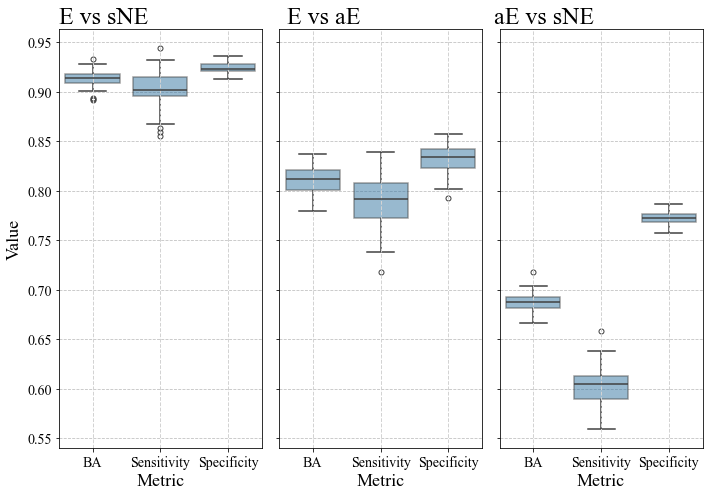

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

tissue = 'Kidney'
scorepath = '../../scores'
features = ["Bio+CCcfs+N2V"]
suffixes = ['bioccn2v']
problems = ['EvsSNE', 'EvsaE', 'aEvsSNE']
labels = ['E vs sNE', 'E vs aE', 'aE vs sNE']
fsize = 14
plt.rcParams["font.family"] = "Times New Roman"
def generate_subplot(Scores, ax, fsize=10):
    sns.boxplot(x='Metric', y='Value', hue='Feature', data=Scores, dodge=True, linewidth=1.5, fliersize=5,
                saturation=0.75, notch=False, boxprops=dict(alpha=0.5), ax=ax)
    ax.set_xlabel("Metric", fontsize=int(fsize)+4)
    ax.set_ylabel('Value', fontsize=int(fsize)+4)
    ax.tick_params(axis='both', which='major', labelsize=fsize)
    ax.grid(axis="y", linestyle="--", alpha=0.8)
    unique_metrics = Scores["Metric"].unique()
    for i in range(0, len(unique_metrics)):
        ax.axvline(x=i, color='lightgray', linestyle='--', linewidth=1)
    ax.get_legend().remove()

# Creazione di una figura con tre subplot su stessa riga
fig, axs = plt.subplots(1, len(problems), figsize=(10, 7), sharey=True)

# Iterazione sui subplot e applicazione della funzione generate_subplot
for i, problem in enumerate(problems):
    dfs = []
    for feature, suffix in zip(features, suffixes):
        df_tmp = pd.read_csv(os.path.join(scorepath, f"score_HELP_{tissue}_{problem}_{suffix}.csv")).drop(columns=["ROC-AUC", "Accuracy", "MCC", "CM"])
        df_tmp['Feature'] = feature
        dfs.append(df_tmp)

    # Merge datasets and modify the dataframe for boxplot generation
    Scores = pd.concat(dfs)
    Scores = pd.melt(Scores, id_vars=["Feature"], var_name="Metric", value_name="Value")
    generate_subplot(Scores, axs[i], fsize=fsize)
    axs[i].set_title(f"{labels[i]}", x=0.22, y=1.0, fontsize=24)

# Posizionamento della legenda unica
#handles, labels = axs[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.21, 0.10), fontsize=fsize, title='Feature', title_fontsize='10')

# Visualizzazione della figura
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import os
scorepath = '../../data4rev/scores'
method1 = 'HELP'
tissue = 'Kidney'
problems = ['EvsSNE', 'EvsAE', 'AEvsSNE']
precision = 3
df_p = pd.DataFrame()
df_means = pd.DataFrame()
features = ["Bio+CCcfs+N2V"]
suffixes = ['bioccn2v','bioccn2v','bioccn2v']
cmlist = []
for problem, suffix in zip(problems,suffixes):
    df = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_{suffix}.csv"))
    metrics = df.drop(columns=['CM']).columns
    means, stds = df.drop(columns=['CM']).mean(), df.drop(columns=['CM']).std()
    row_df = pd.DataFrame([[f"{means[m]:.3f}±{stds[m]:.3f}" for m in metrics]], columns=metrics, index=[problem])
    row_df.index.name = 'problem'
    cma = np.zeros((2,2), dtype=float)
    dfcm = df['CM'].replace(regex=r' ', value=r',').replace(regex=r'\[,', value='[').replace(regex=r'\n', value=',').replace(regex=r',,,', value=',').replace(regex=r',,', value=',')
    for i in range(len(df)):
        cma += np.array(eval(dfcm.iloc[i])) / 10
    row_df['CM'] = f'{cma}'
    row_df['CM'] = row_df['CM'].replace(regex=r' ', value=r',').replace(regex=r'\[,', value='[').replace(regex=r'\n', value=',').replace(regex=r',,,', value=',').replace(regex=r',,', value=',')
    cmlist += ["\cm{"+"{:.1f}".format(cma[0][0])+"}{"+"{:.1f}".format(cma[0][1])+"}{"+"{:.1f}".format(cma[1][0])+"}{"+"{:.1f}".format(cma[1][1])+"}{E}{NE}{"+"{:.1f}".format(cma[0][0]+cma[0][1])+"}{"+"{:.1f}".format(cma[1][0]+cma[1][1])+"}"]
    df_means = pd.concat([df_means, pd.DataFrame([[f"{means[m]:.3f}" for m in metrics]], columns=metrics)])
    df_p = pd.concat([df_p, row_df])

df_means = df_means.set_index(pd.Index(data=problems, name='feature'))

print(tabulate(df_p.T, headers=problems, tablefmt="latex"))
print("CM & " + " & ".join(cmlist))

\begin{tabular}{llll}
\hline
             & EvsSNE                            & EvsAE                          & AEvsSNE                            \\
\hline
 ROC-AUC     & 0.974±0.004                       & 0.893±0.009                    & 0.742±0.010                        \\
 Accuracy    & 0.927±0.005                       & 0.822±0.012                    & 0.754±0.006                        \\
 BA          & 0.919±0.008                       & 0.810±0.015                    & 0.680±0.010                        \\
 Sensitivity & 0.908±0.018                       & 0.780±0.027                    & 0.560±0.018                        \\
 Specificity & 0.929±0.006                       & 0.839±0.013                    & 0.801±0.007                        \\
 MCC         & 0.674±0.014                       & 0.592±0.027                    & 0.322±0.017                        \\
 CM          & [[1127.9,114.1],[,914.1,11971.9]] & [[969.3,272.7],[499.9,2608.1]] & [[1739.5,1368.5],[2564.1,1